In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas as pd

In [41]:
# df = pd.read_csv(os.getcwd() + '/Data/us_states_clean.csv').drop(columns = ['Unnamed: 0'])
df = pd.read_csv(os.getcwd() + '/Data/us_counties_clean.csv').drop(columns = ['Unnamed: 0'])
df['date'] = pd.to_datetime(df['date'])
df.shape

(1806761, 6)

In [42]:
df.tail()

,date,county,fips,cases,deaths,new_cases
1806756,2021-10-31,"Sweetwater County, WY",56037.0,7575,80.0,0.0
1806757,2021-10-31,"Teton County, WY",56039.0,5204,14.0,0.0
1806758,2021-10-31,"Uinta County, WY",56041.0,3829,26.0,0.0
1806759,2021-10-31,"Washakie County, WY",56043.0,1730,35.0,0.0
1806760,2021-10-31,"Weston County, WY",56045.0,1109,9.0,0.0


In [43]:
start_date, end_date = '2020-04-01', '2020-04-30'

df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [45]:
# df_corrs = df.pivot(index = 'date', columns = 'state_code', values = 'new_cases').corr()
df_corrs = df.pivot(index = 'date', columns = 'county', values = 'new_cases').corr()
df_corrs.shape

(2847, 2847)

In [46]:
# edge_list = []

# for col in df_corrs.columns:
#     for neighb in df_corrs[col][df_corrs[col] > 0.2].index:
#         if col != neighb and (neighb, col, df_corrs.loc[col, neighb]) not in edge_list:
#             edge_list.append((col, neighb, df_corrs.loc[col, neighb]))
            
# len(edge_list)
links = pd.DataFrame(df_corrs.values, columns = df_corrs.columns.values).set_index(keys = df_corrs.columns.values).stack().reset_index()
links.rename(columns = {'level_0': 'var1', 'level_1': 'var2', 0: 'weight'}, inplace = True)
links.head()

,var1,var2,weight
0,"Abbeville County, SC","Abbeville County, SC",1.000000
1,"Abbeville County, SC","Acadia County, LA",-0.099907
2,"Abbeville County, SC","Accomack County, VA",0.199051
3,"Abbeville County, SC","Ada County, ID",-0.147694
4,"Abbeville County, SC","Adair County, KY",-0.012497


In [47]:
links_f = links.loc[(links['weight'] > 0.5) & (links['var1'] != links['var2'])]
links_f.shape

(188766, 3)

In [48]:
corr_g = nx.from_pandas_edgelist(links_f, 'var1', 'var2')

In [49]:
# corr_g = nx.Graph()
# corr_g.add_weighted_edges_from(edge_list)
nx.info(corr_g)

'Graph with 2639 nodes and 94383 edges'

In [50]:
# fig = plt.figure(figsize = (8, 8))
# nx.draw(corr_g, node_color = '#add8e6', with_labels = True)
# plt.show()
# plt.close()

In [51]:
# corr_g.get_edge_data('AR', 'RI')

In [52]:
def degree_distro(nw, name) -> None:
    """Plots the degree distro of a network
    Parameters:
        nw (NetworkX Graph): an undirected graph
        name (str): the name of the network
    Returns:
        None"""
    
    deg_freq = nx.degree_histogram(nw)[1 :]
    degs = [i for i in range(1, len(deg_freq) + 1)]
    
    fig, ax = plt.subplots(figsize = (12, 8))
#     plt.loglog(range(1, len(deg_freq)), deg_freq)
    plt.scatter(degs, deg_freq, color = '#552583')
    plt.plot(degs, deg_freq, color = '#00788c')
    plt.title('{} Degree Distribution'.format(name))
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     plt.grid()
    plt.show()
    plt.close()

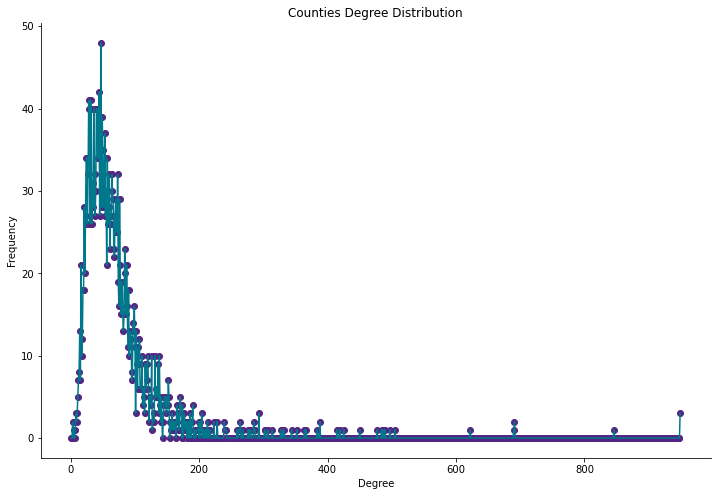

In [53]:
degree_distro(corr_g, 'Counties')